## Tercer examen parcial

Integral Simpson:  0.03464236393076079


'Función original'

  -x           
-ℯ  ⋅sin(2⋅π⋅x)

''

'La solución'

⌠                   
⎮   -x              
⎮ -ℯ  ⋅sin(2⋅π⋅x) dx
⌡                   

'es'

0.03464200141692107

Gráfico de la función


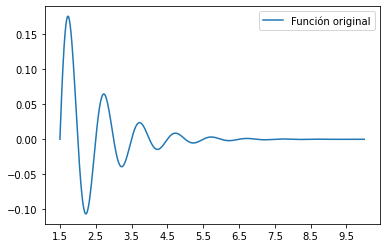

In [60]:
import matplotlib.pyplot as plt
import sympy
from sympy import *
from sympy.abc import x
import numpy as np

init_printing(use_latex="mathjax")

class Graph():
    def plotFunction(self, f, a, b):
        print("Gráfico de la función")
        X = np.linspace(a,b,1000)
        Y = np.zeros(shape=len(X))

        for i in range(len(X)):
            Y[i] = f.subs(x, X[i])

        plt.plot(X,Y, label= "Función original")
        plt.legend(loc="best")
        plt.xticks(np.arange(a, b, step=1))
    
class Cuadratura:
    def Simpson38(self,f, a, b):
        F = list()
        X = np.linspace(a,b,4)
        for i in range(len(X)):
            F.append(f.subs(x,X[i]))
        return (b-a)*(F[0]+3*F[1]+3*F[2]+F[3])/8
    
    def errorSimpson(self,f, a, b):
        xi = (a+b)/2
        f4 = diff(f, x, x, x, x)
        return -((b-a)**5/6480)*f4.subs(x, xi)
    
    def recursiveAdpt(self,f, a, b, tol):
        c = (a+b)/2
        I1 = self.Simpson38(f,a,b)
        I2 = self.Simpson38(f,a,c) + self.Simpson38(f,c,b)
        if abs(I2 -I1) < tol:
            I = I2 +(I2-I1)/15
        else:
            Ia = self.recursiveAdpt(f, a, c,tol)
            Ib = self.recursiveAdpt(f, c, b,tol)
            I = Ia + Ib
        
        return I


def main():
    f = -sympy.exp(-x) * sin(2*pi*x)
    a = 1.5
    b = 10
    tol = 0.0001
    
    Cuad = Cuadratura ()
    simpson = Cuad.recursiveAdpt(f, a, b, tol)
    g = 0.2+25*x-200*x**2+675*x**3-900*x**4+400*x**5
    test = Cuad.Simpson38(g, 0, 0.8)
    #print("Prueba Simpson: ", float(test))
    print("Integral Simpson: ", float(simpson))
    
    display("Función original", f)
    display("","La solución",Integral(f), "es", float(integrate(f, (x, a,b))))

    g = Graph()

    g.plotFunction(f,a,b)


if __name__ == "__main__":
    main()

In [ ]:
def Adaptativa(self, f, a, b, tol):
        I = self.Simpson38(f, a, b)
        error = self.errorSimpson(f, a, b)
        if abs(error) > tol:
            c = (a+b)/2
            Ia = self.Adaptativa(f, a, c, tol)
            Ib = self.Adaptativa(f, c, b, tol)
            I = Ia + Ib
        return I 